In [64]:
#Importing necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import  date, datetime 
import calendar
import io



In [65]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [66]:
#To make fonts bigger
#df.style.set_table_attributes('style="font-size: 17px"')

In [67]:
#To load the csv file into padas Dataframe
Spot_Dataframe = pd.read_csv('Spot_IT+ES.csv')
Spot_Dataframe.head(10)



,Date,ESP_OMIE,ITA_GME
0,31/12/2017 23,6.74,45.82232
1,01/01/2018 00,4.74,44.16000
2,01/01/2018 01,3.66,42.24000
3,01/01/2018 02,2.30,39.29000
4,01/01/2018 03,2.30,36.00000
5,01/01/2018 04,2.06,41.99000
6,01/01/2018 05,2.06,42.25000
7,01/01/2018 06,2.06,44.97000
8,01/01/2018 07,2.30,45.00000
9,01/01/2018 08,2.30,44.94000


In [68]:
#To get information about the Dataframe and check the data type of each column
Spot_Dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22775 entries, 0 to 22774
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      22775 non-null  object 
 1   ESP_OMIE  22775 non-null  float64
 2   ITA_GME   22775 non-null  float64
dtypes: float64(2), object(1)
memory usage: 533.9+ KB


In [69]:
#To View The Shape
Spot_Dataframe.shape

(22775, 3)

In [70]:
# The 'Date' column is an Object data type
# To return the Dataframe with 'Date' in Pandas Datetime Format

Spot_Dataframe = pd.read_csv('Spot_IT+ES.csv', index_col = 0,  parse_dates = ['Date'], dayfirst=True)
Spot_Dataframe

,ESP_OMIE,ITA_GME
Date,,
2017-12-31 23:00:00,6.74,45.82232
2018-01-01 00:00:00,4.74,44.16000
2018-01-01 01:00:00,3.66,42.24000
2018-01-01 02:00:00,2.30,39.29000
2018-01-01 03:00:00,2.30,36.00000
...,...,...
2020-08-06 17:00:00,43.37,55.02673
2020-08-06 18:00:00,46.15,51.62791
2020-08-06 19:00:00,43.39,46.79623


In [71]:
#To view the end of the dataframe
Spot_Dataframe = pd.read_csv('Spot_IT+ES.csv', index_col = 0,  parse_dates = ['Date'], dayfirst=True)
Spot_Dataframe.tail(10)

,ESP_OMIE,ITA_GME
Date,,
2020-08-06 12:00:00,38.36,36.26000
2020-08-06 13:00:00,36.01,36.01000
2020-08-06 14:00:00,36.19,36.19000
2020-08-06 15:00:00,39.69,39.69341
2020-08-06 16:00:00,42.60,44.62006
2020-08-06 17:00:00,43.37,55.02673
2020-08-06 18:00:00,46.15,51.62791
2020-08-06 19:00:00,43.39,46.79623
2020-08-06 20:00:00,41.39,43.35717


In [72]:
# Changing the column names to be more descriptive
Spot_Dataframe.rename(columns={'Date':'DATE', 'ESP_OMIE':'SPAIN', 'ITA_GME':'ITALY'}, inplace=True)
Spot_Dataframe.head(10)

,SPAIN,ITALY
Date,,
2017-12-31 23:00:00,6.74,45.82232
2018-01-01 00:00:00,4.74,44.16000
2018-01-01 01:00:00,3.66,42.24000
2018-01-01 02:00:00,2.30,39.29000
2018-01-01 03:00:00,2.30,36.00000
2018-01-01 04:00:00,2.06,41.99000
2018-01-01 05:00:00,2.06,42.25000
2018-01-01 06:00:00,2.06,44.97000
2018-01-01 07:00:00,2.30,45.00000


In [73]:
#To create a TIME column to specify the time of the day

Spot_Dataframe['TIME'] = Spot_Dataframe.index.time
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME
Date,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00
2018-01-01 00:00:00,4.74,44.16000,00:00:00
2018-01-01 01:00:00,3.66,42.24000,01:00:00
2018-01-01 02:00:00,2.30,39.29000,02:00:00
2018-01-01 03:00:00,2.30,36.00000,03:00:00
2018-01-01 04:00:00,2.06,41.99000,04:00:00
2018-01-01 05:00:00,2.06,42.25000,05:00:00
2018-01-01 06:00:00,2.06,44.97000,06:00:00
2018-01-01 07:00:00,2.30,45.00000,07:00:00


In [74]:
#To create a  DAY column to specify the days of the month
Spot_Dataframe['DAY'] = Spot_Dataframe.index.day
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME,DAY
Date,,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00,31
2018-01-01 00:00:00,4.74,44.16000,00:00:00,1
2018-01-01 01:00:00,3.66,42.24000,01:00:00,1
2018-01-01 02:00:00,2.30,39.29000,02:00:00,1
2018-01-01 03:00:00,2.30,36.00000,03:00:00,1
2018-01-01 04:00:00,2.06,41.99000,04:00:00,1
2018-01-01 05:00:00,2.06,42.25000,05:00:00,1
2018-01-01 06:00:00,2.06,44.97000,06:00:00,1
2018-01-01 07:00:00,2.30,45.00000,07:00:00,1


In [75]:
#To create a  DAY OF YEAR column to specify the days of the year

Spot_Dataframe['DAY OF YEAR'] = Spot_Dataframe.index.dayofyear
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR
Date,,,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00,31,365
2018-01-01 00:00:00,4.74,44.16000,00:00:00,1,1
2018-01-01 01:00:00,3.66,42.24000,01:00:00,1,1
2018-01-01 02:00:00,2.30,39.29000,02:00:00,1,1
2018-01-01 03:00:00,2.30,36.00000,03:00:00,1,1
2018-01-01 04:00:00,2.06,41.99000,04:00:00,1,1
2018-01-01 05:00:00,2.06,42.25000,05:00:00,1,1
2018-01-01 06:00:00,2.06,44.97000,06:00:00,1,1
2018-01-01 07:00:00,2.30,45.00000,07:00:00,1,1


In [76]:
#To create a  WEEK DAY column to specify the week days 
Spot_Dataframe['WEEK DAY'] = Spot_Dataframe.index.day_name()
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY
Date,,,,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00,31,365,Sunday
2018-01-01 00:00:00,4.74,44.16000,00:00:00,1,1,Monday
2018-01-01 01:00:00,3.66,42.24000,01:00:00,1,1,Monday
2018-01-01 02:00:00,2.30,39.29000,02:00:00,1,1,Monday
2018-01-01 03:00:00,2.30,36.00000,03:00:00,1,1,Monday
2018-01-01 04:00:00,2.06,41.99000,04:00:00,1,1,Monday
2018-01-01 05:00:00,2.06,42.25000,05:00:00,1,1,Monday
2018-01-01 06:00:00,2.06,44.97000,06:00:00,1,1,Monday
2018-01-01 07:00:00,2.30,45.00000,07:00:00,1,1,Monday


In [77]:
#To create a  WEEK column to specify the week of the year
Spot_Dataframe['WEEK'] = Spot_Dataframe.index.week
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK
Date,,,,,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00,31,365,Sunday,52
2018-01-01 00:00:00,4.74,44.16000,00:00:00,1,1,Monday,1
2018-01-01 01:00:00,3.66,42.24000,01:00:00,1,1,Monday,1
2018-01-01 02:00:00,2.30,39.29000,02:00:00,1,1,Monday,1
2018-01-01 03:00:00,2.30,36.00000,03:00:00,1,1,Monday,1
2018-01-01 04:00:00,2.06,41.99000,04:00:00,1,1,Monday,1
2018-01-01 05:00:00,2.06,42.25000,05:00:00,1,1,Monday,1
2018-01-01 06:00:00,2.06,44.97000,06:00:00,1,1,Monday,1
2018-01-01 07:00:00,2.30,45.00000,07:00:00,1,1,Monday,1


In [78]:
#To create a  MONTH column to specify the months
Spot_Dataframe['MONTH'] = Spot_Dataframe.index.month_name()
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH
Date,,,,,,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00,31,365,Sunday,52,December
2018-01-01 00:00:00,4.74,44.16000,00:00:00,1,1,Monday,1,January
2018-01-01 01:00:00,3.66,42.24000,01:00:00,1,1,Monday,1,January
2018-01-01 02:00:00,2.30,39.29000,02:00:00,1,1,Monday,1,January
2018-01-01 03:00:00,2.30,36.00000,03:00:00,1,1,Monday,1,January
2018-01-01 04:00:00,2.06,41.99000,04:00:00,1,1,Monday,1,January
2018-01-01 05:00:00,2.06,42.25000,05:00:00,1,1,Monday,1,January
2018-01-01 06:00:00,2.06,44.97000,06:00:00,1,1,Monday,1,January
2018-01-01 07:00:00,2.30,45.00000,07:00:00,1,1,Monday,1,January


In [79]:
#To create a YEAR  column to specify the Years

Spot_Dataframe['YEAR'] = Spot_Dataframe.index.year
Spot_Dataframe.head(10)

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2017-12-31 23:00:00,6.74,45.82232,23:00:00,31,365,Sunday,52,December,2017
2018-01-01 00:00:00,4.74,44.16000,00:00:00,1,1,Monday,1,January,2018
2018-01-01 01:00:00,3.66,42.24000,01:00:00,1,1,Monday,1,January,2018
2018-01-01 02:00:00,2.30,39.29000,02:00:00,1,1,Monday,1,January,2018
2018-01-01 03:00:00,2.30,36.00000,03:00:00,1,1,Monday,1,January,2018
2018-01-01 04:00:00,2.06,41.99000,04:00:00,1,1,Monday,1,January,2018
2018-01-01 05:00:00,2.06,42.25000,05:00:00,1,1,Monday,1,January,2018
2018-01-01 06:00:00,2.06,44.97000,06:00:00,1,1,Monday,1,January,2018
2018-01-01 07:00:00,2.30,45.00000,07:00:00,1,1,Monday,1,January,2018


In [21]:
#To view the end of the dataframe
Spot_Dataframe.tail(10)

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2020-08-06 12:00:00,38.36,36.26000,12:00:00,6,219,Thursday,32,August,2020
2020-08-06 13:00:00,36.01,36.01000,13:00:00,6,219,Thursday,32,August,2020
2020-08-06 14:00:00,36.19,36.19000,14:00:00,6,219,Thursday,32,August,2020
2020-08-06 15:00:00,39.69,39.69341,15:00:00,6,219,Thursday,32,August,2020
2020-08-06 16:00:00,42.60,44.62006,16:00:00,6,219,Thursday,32,August,2020
2020-08-06 17:00:00,43.37,55.02673,17:00:00,6,219,Thursday,32,August,2020
2020-08-06 18:00:00,46.15,51.62791,18:00:00,6,219,Thursday,32,August,2020
2020-08-06 19:00:00,43.39,46.79623,19:00:00,6,219,Thursday,32,August,2020
2020-08-06 20:00:00,41.39,43.35717,20:00:00,6,219,Thursday,32,August,2020


In [23]:
#To count the number of NaN values in SPAIN column

NaN_ESP_OMIE = Spot_Dataframe['SPAIN'].isna().sum()
NaN_ESP_OMIE

0

In [24]:
#To count the number of NaN values in ITALY column
NaN_ITA_GME = Spot_Dataframe['ITALY'].isna().sum()
NaN_ITA_GME 

0

In [80]:
# To round the values in ITALY column to 2 decimal places
Spot_Dataframe['ITALY']  = Spot_Dataframe['ITALY'].round(decimals = 2)
#Spot_Dataframe.head(10)

In [81]:
#To check the distinct years in the data
Spot_Dataframe['YEAR'].unique()

array([2017, 2018, 2019, 2020], dtype=int64)

In [82]:
# To return the total sum  for each year
Total_Consumption = Spot_Dataframe.groupby(['YEAR'], as_index=False)[['SPAIN', 'ITALY']].sum()
Total_Consumption 

,YEAR,SPAIN,ITALY
0,2017,6.74,45.82
1,2018,501957.46,537087.00
2,2019,417663.19,458357.74
3,2020,157441.79,174420.96


In [83]:
# To return the average consumption  for each year
Average_Consumption = Spot_Dataframe.groupby(['YEAR'], as_index=False)[['SPAIN', 'ITALY']].mean()
Average_Consumption

,YEAR,SPAIN,ITALY
0,2017,6.740000,45.820000
1,2018,57.301080,61.311301
2,2019,47.678446,52.323943
3,2020,29.966081,33.197746


In [84]:
# To return the maximum value for each year
Maximum_Consumption = Spot_Dataframe.groupby(['YEAR'], as_index=False)[['SPAIN', 'ITALY']].max()
Maximum_Consumption 

,YEAR,SPAIN,ITALY
0,2017,6.74,45.82
1,2018,84.13,159.40
2,2019,74.74,108.38
3,2020,62.48,77.94


In [85]:
# To return the maximum value for each year
Minimum_Consumption = Spot_Dataframe.groupby(['YEAR'], as_index=False)[['SPAIN', 'ITALY']].min()
Minimum_Consumption 

,YEAR,SPAIN,ITALY
0,2017,6.74,45.82
1,2018,2.06,6.97
2,2019,0.03,1.00
3,2020,1.02,0.00


<Figure size 1080x576 with 0 Axes>

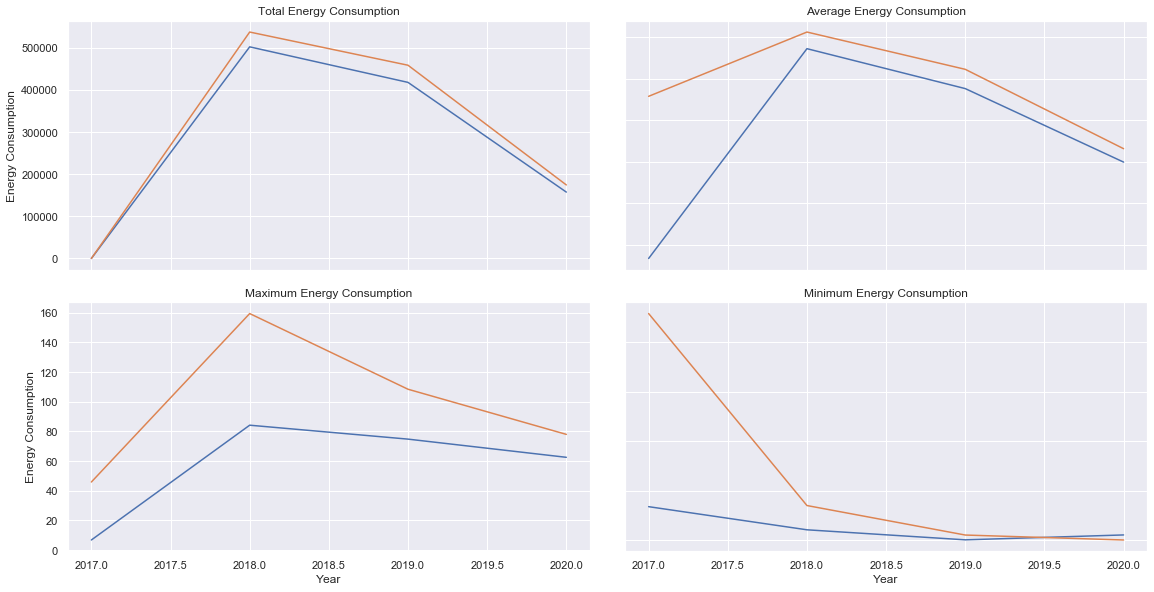

In [87]:
# To plot the the total, average, maximim and minimum energy consumption



plt.figure(figsize=(15, 8))
figure, axes = plt.subplots(ncols = 2, nrows = 2)

axes[0, 0].plot(Total_Consumption['YEAR'], Total_Consumption['SPAIN'], Total_Consumption['YEAR'], Total_Consumption['ITALY'])
#create specific subplots

axes[0, 1].plot(Average_Consumption['YEAR'], Average_Consumption['SPAIN'], Average_Consumption['YEAR'], Average_Consumption['ITALY'])
axes[1, 0].plot(Maximum_Consumption['YEAR'], Maximum_Consumption['SPAIN'], Maximum_Consumption['YEAR'], Maximum_Consumption['ITALY'])
axes[1, 1].plot(Minimum_Consumption['YEAR'], Minimum_Consumption['SPAIN'], Minimum_Consumption['YEAR'], Minimum_Consumption['ITALY'])
figure.tight_layout()
#plt.legend()
#axs[0, 0].plot(x, y)
axes[0, 0].set_title('Total Energy Consumption')
#axs[0, 1].plot(x, y, 'tab:orange')
axes[0, 1].set_title('Average Energy Consumption')
#axs[1, 0].plot(x, -y, 'tab:green')
axes[1, 0].set_title('Maximum Energy Consumption')
#axs[1, 1].plot(x, -y, 'tab:red')
axes[1, 1].set_title('Minimum Energy Consumption')

for ax in axes.flat:
    ax.set(xlabel='Year', ylabel='Energy Consumption')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    



In [88]:
#To return the maximum Value in the ITALY column
Spot_Dataframe[Spot_Dataframe["ITALY"] == Spot_Dataframe["ITALY"].max()] 

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2018-02-27 18:00:00,71.88,159.4,18:00:00,27,58,Tuesday,9,February,2018


In [89]:
 #To return the minimum Value in the SPAIN column
    
Spot_Dataframe[Spot_Dataframe["SPAIN"] == Spot_Dataframe["SPAIN"].min()]

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2019-12-24 03:00:00,0.03,2.5,03:00:00,24,358,Tuesday,52,December,2019


In [90]:
#To return the minimum Value in the ITALY column
Spot_Dataframe[Spot_Dataframe["ITALY"] == Spot_Dataframe["ITALY"].min()] 

,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2020-04-05 12:00:00,5.50,0.0,12:00:00,5,96,Sunday,14,April,2020
2020-04-12 12:00:00,16.98,0.0,12:00:00,12,103,Sunday,15,April,2020
2020-04-13 11:00:00,26.29,0.0,11:00:00,13,104,Monday,16,April,2020
2020-04-13 12:00:00,24.96,0.0,12:00:00,13,104,Monday,16,April,2020
2020-04-13 13:00:00,22.86,0.0,13:00:00,13,104,Monday,16,April,2020


Text(0.5, 1.0, 'Energy Consumption Trend from December 2017 to August 2020')

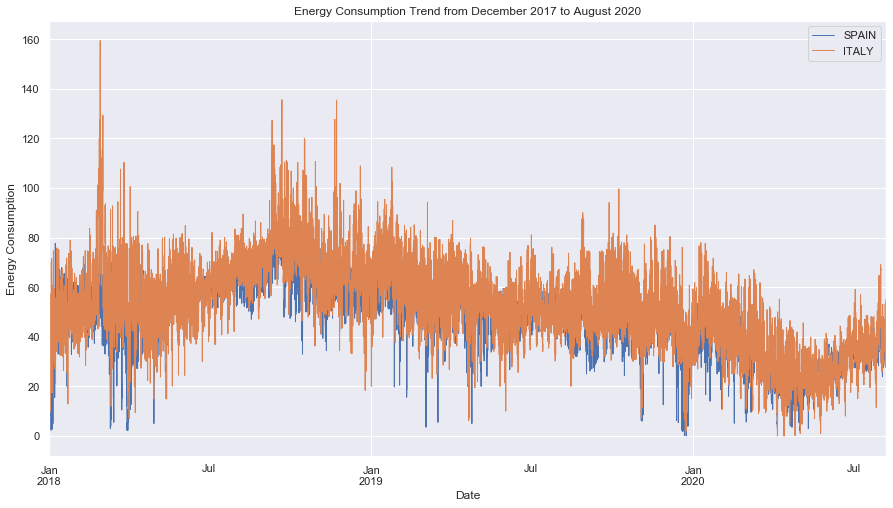

In [91]:
#To visualize the energy consumption pattern for the time period using seaborn

sns.set(rc={'figure.figsize':(15, 8)})
ax = Spot_Dataframe[['SPAIN', 'ITALY']].plot(linewidth=1.0);
ax.set_ylabel('Energy Consumption')
plt.title('Energy Consumption Trend from December 2017 to August 2020')

Text(0.5, 1.0, 'Energy Consumption Trend from December 2017 to August 2020')

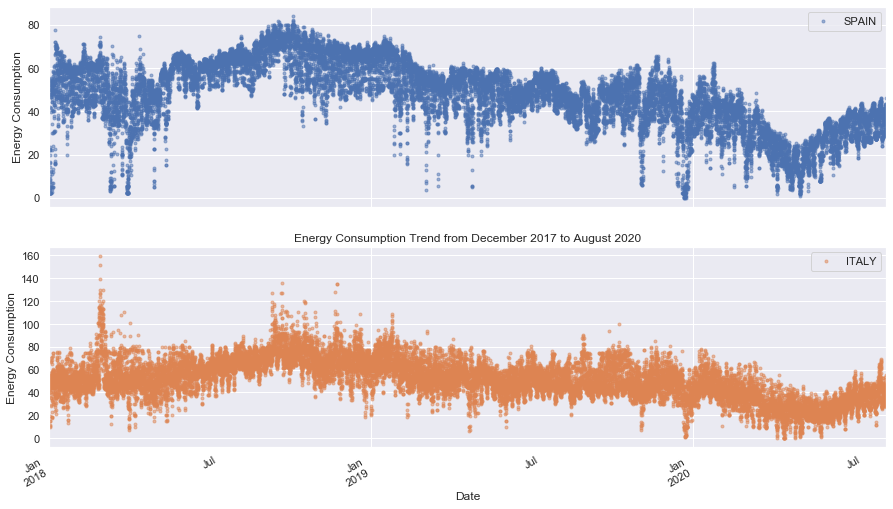

In [641]:
# subplot to visualize energy consumption pattern fron 2017 to 2020 in both countries 

axes = Spot_Dataframe[['SPAIN', 'ITALY']].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Energy Consumption')
plt.title('Energy Consumption Trend from December 2017 to August 2020')

Text(0.5, 1.0, 'SPAIN Energy Consumption Trend for the Year 2018')

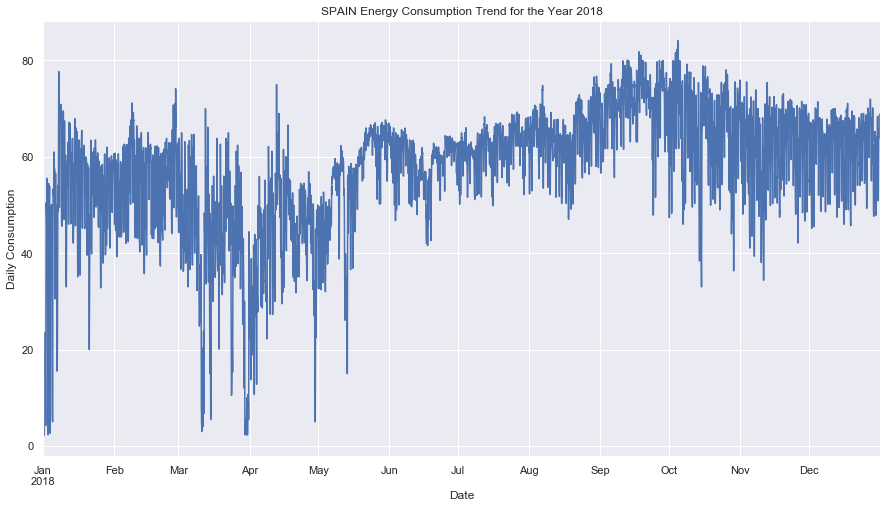

In [93]:
#To visualize the energy consumption of Spain for the year 2018
ax = Spot_Dataframe.loc['2018', 'SPAIN'].plot()
ax.set_ylabel('Daily Consumption')
plt.title('SPAIN Energy Consumption Trend for the Year 2018')

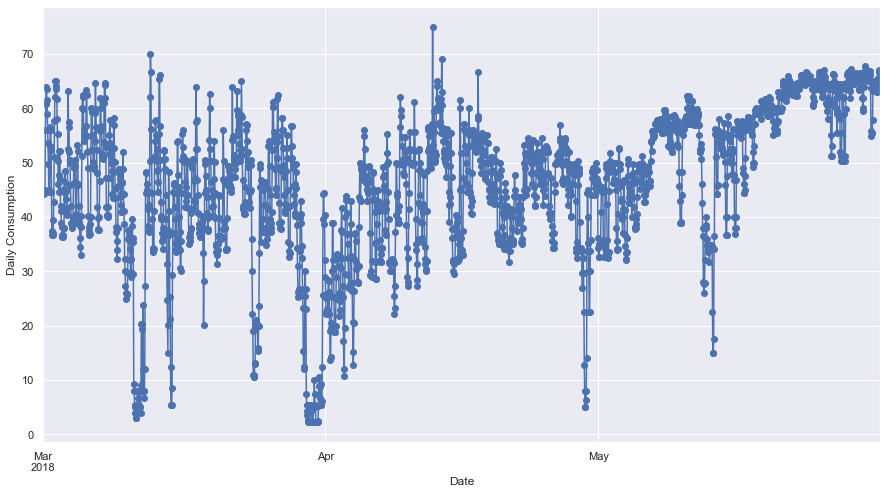

In [622]:
#To visualize Energy Consumption of Spain from '2018-03':'2018-05

ax = Spot_Dataframe.loc['2018-03':'2018-05', 'SPAIN'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption')
plt.title("Energy Consumption of Spain from '2018-03':'2018-05")

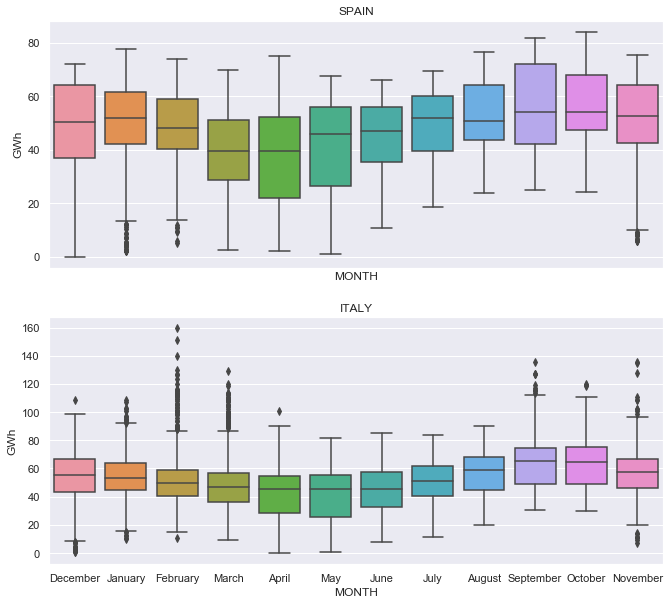

In [628]:
# To make box plot  of both countries for the entire period by months
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['SPAIN', 'ITALY'], axes):
    sns.boxplot(data=Spot_Dataframe, x='MONTH', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

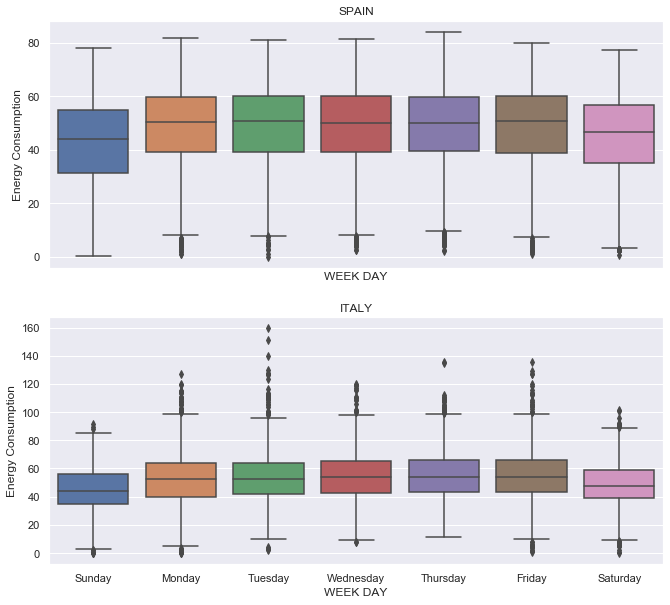

In [820]:
# To make box plot  of both countries for the entire period by weeks
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['SPAIN', 'ITALY'], axes):
    sns.boxplot(data=Spot_Dataframe, x='WEEK DAY', y=name, ax=ax)
    ax.set_ylabel('Energy Consumption')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

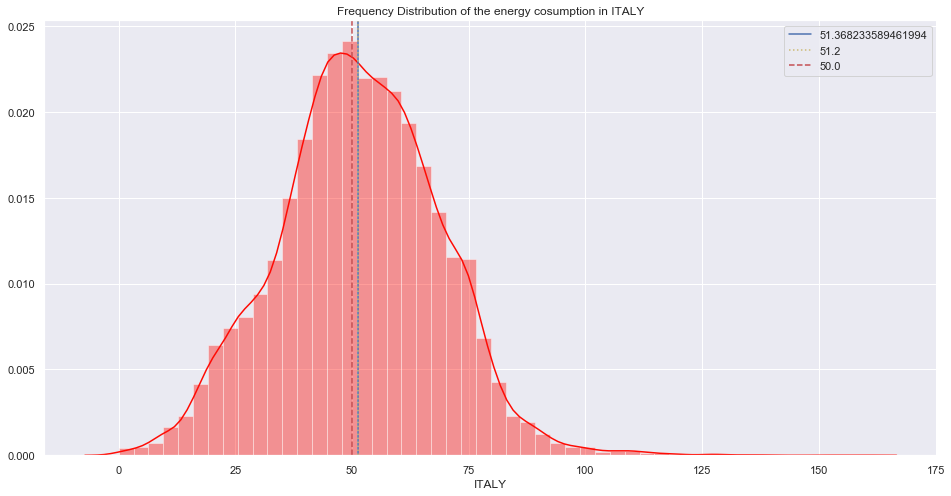

In [50]:
#To create a distribution of the Italy Column

sns.set(rc={'figure.figsize':(16, 8 )})

colors = ["#FF0B04", "#4374B3"]

sns.set_palette(sns.color_palette(colors))
sns.distplot(Spot_Dataframe["ITALY"])
plt.title('Frequency Distribution of the energy cosumption in ITALY')
plt.axvline(np.mean(Spot_Dataframe["ITALY"]), color='b', linestyle='-', linewidth=1.5, label=str(np.mean(Spot_Dataframe["ITALY"])))
plt.axvline(np.median(Spot_Dataframe["ITALY"]), color='y', linestyle=':', linewidth=1.5, label=str(np.median(Spot_Dataframe["ITALY"])))
plt.axvline(Spot_Dataframe["ITALY"].mode().iat[0], color='r', linestyle='--', linewidth=1.5, label=str(Spot_Dataframe["ITALY"].mode().iat[0]))
plt.legend()



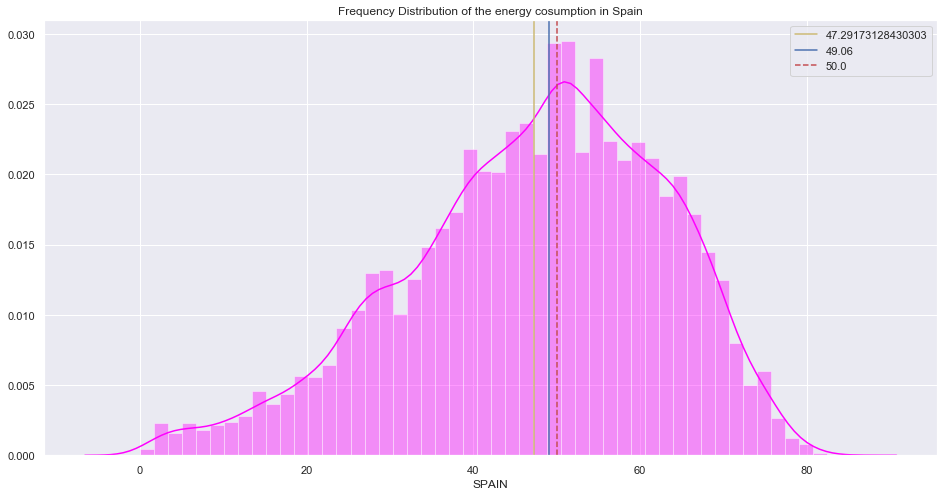

In [94]:
#To create a distribution of the Spain Column

sns.set(rc={'figure.figsize':(16, 8 )})
colors = ["#ffff00", "#660000"]
colors = ["#ff00ff", "#bfff00"]

sns.set_palette(sns.color_palette(colors))
sns.distplot(Spot_Dataframe["SPAIN"])
plt.axvline(np.mean(Spot_Dataframe["SPAIN"]), color='y', linestyle='-', linewidth=1.5, label=str(np.mean(Spot_Dataframe["SPAIN"])))
plt.title('Frequency Distribution of the energy cosumption in Spain')
plt.axvline(np.median(Spot_Dataframe["SPAIN"]), color='b', linestyle='-', linewidth=1.5, label=str(np.median(Spot_Dataframe["SPAIN"])))
plt.axvline(Spot_Dataframe["SPAIN"].mode().iat[0], color='r', linestyle='--', linewidth=1.5, label=str(Spot_Dataframe["SPAIN"].mode().iat[0]))
plt.legend()

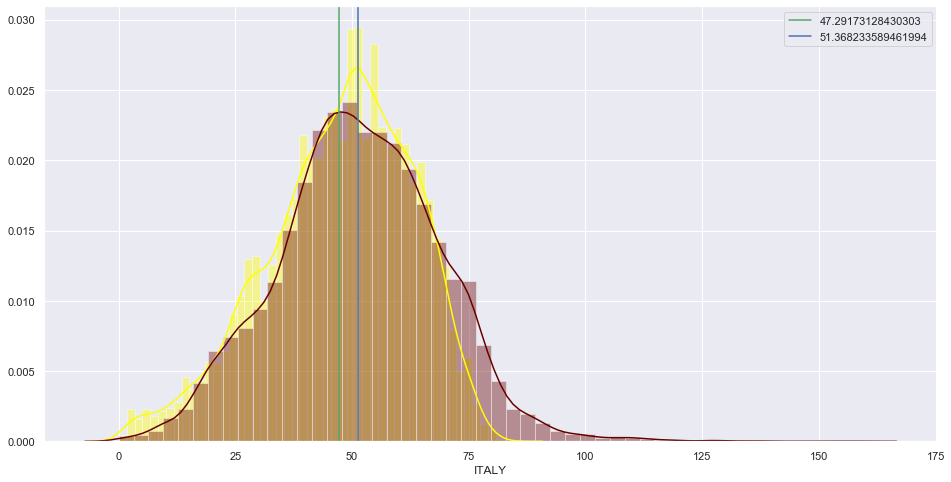

In [95]:
# To create a distribution of both columns


sns.set(rc={'figure.figsize':(16, 8 )})
colors = ["#ffff00", "#660000"]

sns.set_palette(sns.color_palette(colors))
sns.distplot(Spot_Dataframe['SPAIN'])
sns.distplot(Spot_Dataframe['ITALY'])



plt.axvline(np.mean(Spot_Dataframe["SPAIN"]), color='g', linestyle='-', linewidth=1.5, label=str(np.mean(Spot_Dataframe["SPAIN"])))
plt.axvline(np.mean(Spot_Dataframe["ITALY"]), color='b', linestyle='-', linewidth=1.5, label=str(np.mean(Spot_Dataframe["ITALY"])))
plt.legend()



Text(0.5, 1.0, 'Energy Consuption Trend from 2017-2020')

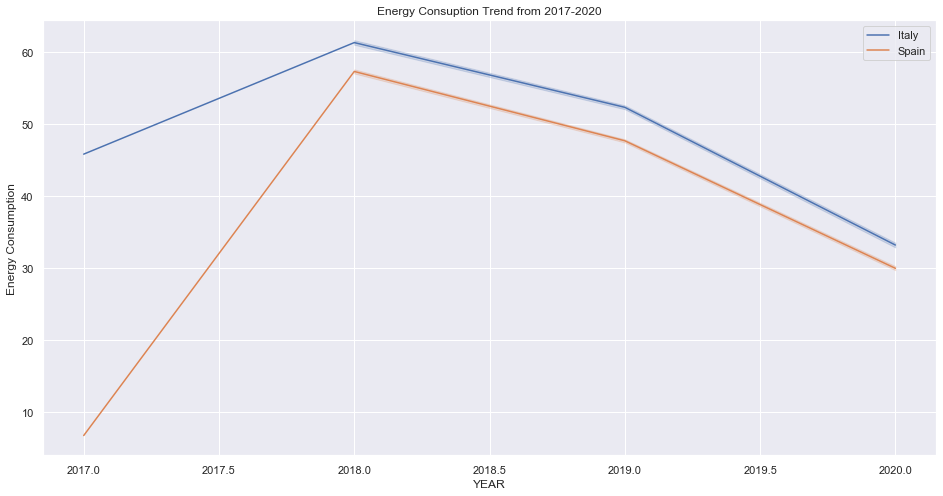

In [63]:
#To create line plot showing energy consumption Trend
colors = ["#008000", "#FF00FF"]
sns.set_palette(sns.color_palette(colors))
sns.set(rc={'figure.figsize':(16, 8)})
sns.lineplot(x="YEAR", y="ITALY", data=Spot_Dataframe, label = 'Italy')
sns.lineplot(x="YEAR", y="SPAIN", data=Spot_Dataframe, label = 'Spain')
plt.ylabel('Energy Consumption')
plt.title('Energy Consuption Trend from 2017-2020')

In [97]:
#A function that returns the data for a specific year
def Specific_Year(Dataframe,  year):
    YEAR_DATA = Dataframe[Dataframe["YEAR"] == year]
    return YEAR_DATA

Year_2018 = Specific_Year(Spot_Dataframe,  2018)
Year_2018




,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2018-01-01 00:00:00,4.74,44.16,00:00:00,1,1,Monday,1,January,2018
2018-01-01 01:00:00,3.66,42.24,01:00:00,1,1,Monday,1,January,2018
2018-01-01 02:00:00,2.30,39.29,02:00:00,1,1,Monday,1,January,2018
2018-01-01 03:00:00,2.30,36.00,03:00:00,1,1,Monday,1,January,2018
2018-01-01 04:00:00,2.06,41.99,04:00:00,1,1,Monday,1,January,2018
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,68.40,70.70,19:00:00,31,365,Monday,1,December,2018
2018-12-31 20:00:00,66.88,59.84,20:00:00,31,365,Monday,1,December,2018
2018-12-31 21:00:00,63.93,55.70,21:00:00,31,365,Monday,1,December,2018


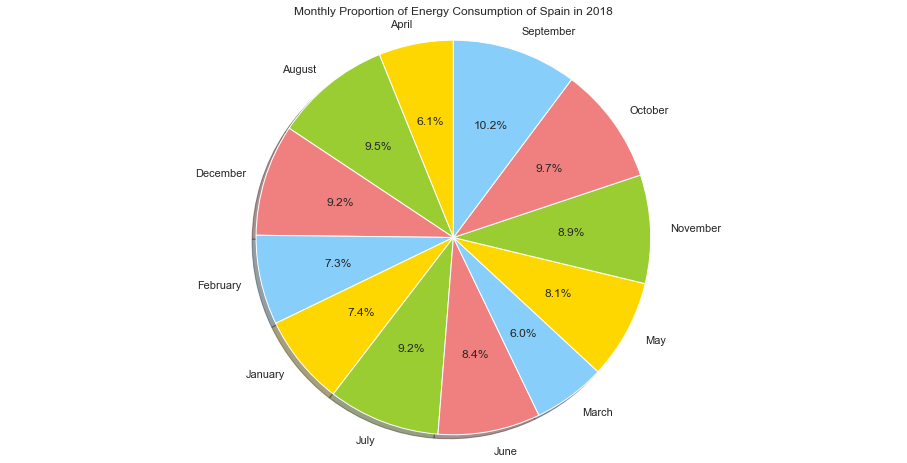

In [98]:
# To plot pie chart of any year
def Aggregate(Dataframe,  year):
    YEAR_DATA = Specific_Year(Dataframe,  year)
    Year_2018 = YEAR_DATA.groupby(['MONTH']).agg({'SPAIN':'sum','ITALY':'sum'}).reset_index()
    labels = Year_2018["MONTH"]
    sizes = Year_2018["SPAIN"]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0)  # explode 1st slice

    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Monthly Proportion of Energy Consumption of Spain in 2018')

    plt.axis('equal')
    return plt.show()
Aggregate(Spot_Dataframe,  2018)

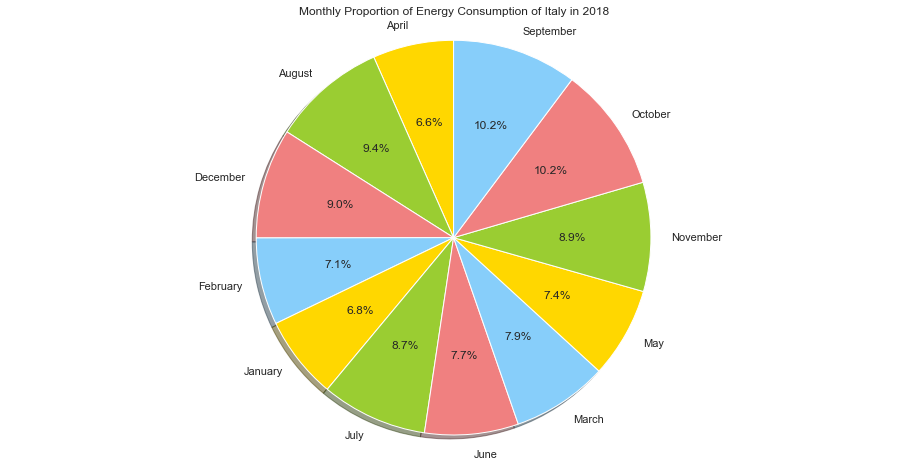

In [56]:
def Aggregate(Dataframe,  year):
    YEAR_DATA = Specific_Year(Dataframe,  year)
    Year_2018 = YEAR_DATA.groupby(['MONTH']).agg({'SPAIN':'sum','ITALY':'sum'}).reset_index()
    labels = Year_2018["MONTH"]
    sizes = Year_2018["ITALY"]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0)  # explode 1st slice

    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Monthly Proportion of Energy Consumption of Italy in 2018')

    plt.axis('equal')
    return plt.show()
Aggregate(Spot_Dataframe,  2018)

In [99]:
#To view dataframe for a particular month and year

def Specific_Year(Dataframe,  year, month):
    YEAR_DATA = Dataframe[(Dataframe["YEAR"] == year) & (Dataframe["MONTH"] == month)]
    return YEAR_DATA
                                                         
January = Specific_Year(Spot_Dataframe,  2018, "January")

January




,SPAIN,ITALY,TIME,DAY,DAY OF YEAR,WEEK DAY,WEEK,MONTH,YEAR
Date,,,,,,,,,
2018-01-01 00:00:00,4.74,44.16,00:00:00,1,1,Monday,1,January,2018
2018-01-01 01:00:00,3.66,42.24,01:00:00,1,1,Monday,1,January,2018
2018-01-01 02:00:00,2.30,39.29,02:00:00,1,1,Monday,1,January,2018
2018-01-01 03:00:00,2.30,36.00,03:00:00,1,1,Monday,1,January,2018
2018-01-01 04:00:00,2.06,41.99,04:00:00,1,1,Monday,1,January,2018
...,...,...,...,...,...,...,...,...,...
2018-01-31 19:00:00,60.61,53.47,19:00:00,31,31,Wednesday,5,January,2018
2018-01-31 20:00:00,60.37,51.12,20:00:00,31,31,Wednesday,5,January,2018
2018-01-31 21:00:00,59.25,48.44,21:00:00,31,31,Wednesday,5,January,2018


In [384]:
#To view dataframe for a particular month, year and day
def Specific_Year(Dataframe,  year, month, day):
    YEAR_DATA = Dataframe[(Dataframe["YEAR"] == year) & (Dataframe["MONTH"] == month) & (Dataframe["DAY"] == day) ]
    return YEAR_DATA
                                                         
Daily_values = Specific_Year(Spot_Dataframe,  2018, "January", 1)

,Date,ESP_OMIE,ITA_GME,DATE,TIME,DAY,WEEK DAY,MONTH,YEAR
1,2018-01-01 00:00:00,4.74,44.16,2018-01-01 00:00:00,00:00:00,1,Monday,January,2018
2,2018-01-01 01:00:00,3.66,42.24,2018-01-01 01:00:00,01:00:00,1,Monday,January,2018
3,2018-01-01 02:00:00,2.30,39.29,2018-01-01 02:00:00,02:00:00,1,Monday,January,2018
4,2018-01-01 03:00:00,2.30,36.00,2018-01-01 03:00:00,03:00:00,1,Monday,January,2018
5,2018-01-01 04:00:00,2.06,41.99,2018-01-01 04:00:00,04:00:00,1,Monday,January,2018
6,2018-01-01 05:00:00,2.06,42.25,2018-01-01 05:00:00,05:00:00,1,Monday,January,2018
7,2018-01-01 06:00:00,2.06,44.97,2018-01-01 06:00:00,06:00:00,1,Monday,January,2018
8,2018-01-01 07:00:00,2.30,45.00,2018-01-01 07:00:00,07:00:00,1,Monday,January,2018
9,2018-01-01 08:00:00,2.30,44.94,2018-01-01 08:00:00,08:00:00,1,Monday,January,2018
10,2018-01-01 09:00:00,2.30,45.02,2018-01-01 09:00:00,09:00:00,1,Monday,January,2018
